# Support vector regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A simple nonlinear function
The aim is to create some synthetic data which is not very amenable for linear regression models. We will show how a Support Vector regressor enhances the predictive performance.

In [2]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

### Generate features and target data for regression

In [3]:
n_samples = 200
n_features = 4

In [4]:
x = 5*np.random.rand(n_samples,n_features)

In [5]:
y = nonlinear(x)+np.random.randn(n_samples)

In [6]:
y=y.reshape(n_samples,1)

In [7]:
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])

In [8]:
df.head()

,X1,X2,X3,X4,y
0,2.537604,0.472667,4.511795,4.785245,-0.023526
1,0.499702,0.501959,4.198077,3.068890,0.335887
2,1.766313,4.332586,3.703805,1.125927,0.407807
3,1.703829,4.305987,3.061368,4.508117,0.488757
4,4.196968,3.108648,3.278230,4.955453,1.402770


### Plotting the data

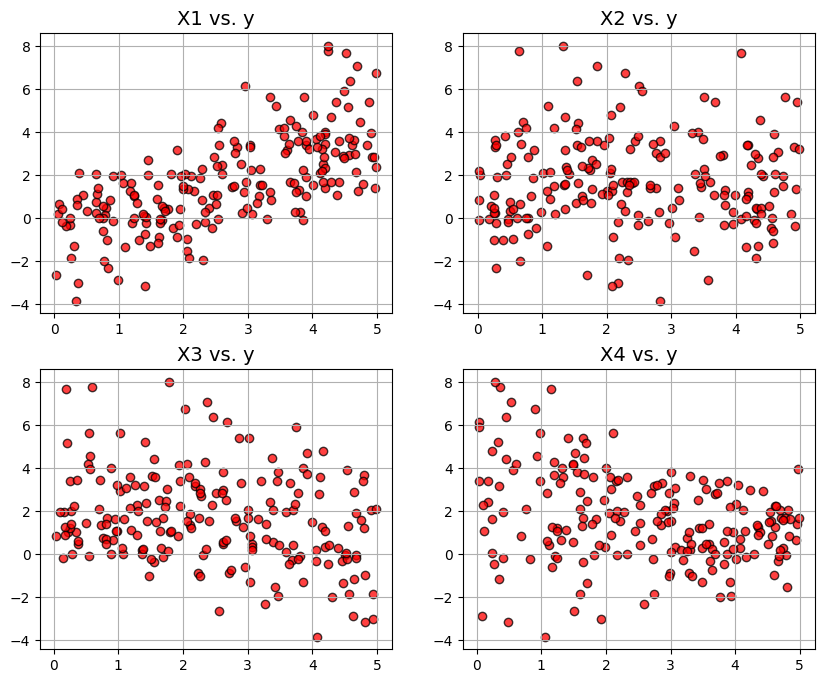

In [9]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

### Test/train split

In [10]:
X = df[['X1','X2','X3','X4']]
y = df['y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Support vector regressor with linear kernel

In [13]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

### Test score

In [14]:
svr_linear.score(X_test,y_test)

0.4719797645977313

### Linear regression as a baseline

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()

In [17]:
linear.fit(X_train,y_train)

LinearRegression()

In [18]:
linear.score(X_test,y_test)

0.475736263928493

### Support vector regressor with Gaussian (radial basis function) kernel

In [19]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [20]:
svr_rbf.score(X_test,y_test)

0.611637484546293

So, clearly, the RBF kernel showed better accuracy on the test set

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 1.4871383345976033
RMSE for RBF kernelized SVR: 1.2753950827968417


#### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}

In [25]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

### Check which was deemed best estimator by the grid search

In [27]:
grid.best_estimator_

SVR(C=2, epsilon=1)

### Fit that estimator to the data and see

In [28]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)

SVR(C=5.0, epsilon=0.5)

In [29]:
svr_best.score(X_test,y_test)

0.659423519496787

In [30]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

RMSE for RBF kernelized SVR: 1.194354945435947
